In [1]:
import numpy as np
from matplotlib import pyplot as plt

Define the problem parameters


In [2]:
A = np.array([[1, 3], [3, 1]]) # low dimensions to plot it, you can test larger sizes
b = np.array([1.1, 0.2])

The function to be minimized is $\frac{1}{2}\|Ax-b\|_2^2$

In [3]:
f = lambda x: 0.5*np.sum((A @ x - b) ** 2)

# derivative of f from matrix calculus
df = lambda x: A.T @ (A @ x - b)


Plot the function

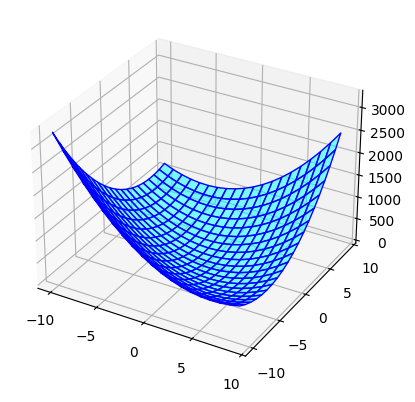

In [4]:
# this function has been prepared only for the visualization sake, no need to go through this but it renders some nice
# graphics :)
F = lambda r1, r2: (r1 * A[0, 0] + r2 * A[0, 1] - b[0]) ** 2 + (r1 * A[1, 0] + r2 * A[1, 1] - b[1]) ** 2
xx, yy = np.meshgrid(np.arange(-10, 10), np.arange(-10, 10))

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, F(xx, yy), edgecolor=[0, 0, 1], alpha=0.5, facecolor=[0, 1, 1])

Parameters of gradient descent

In [5]:
TOL_GRAD_NORM = 1e-5
MAX_ITER = 100
TOL_DIST = 1e-4
alpha = 0.05 #  step size.. play with this, the system might get really unstable

Initialization: test different inizializations, the function is convex, you always converge to the same solution

In [6]:
x = np.array([-5, 10])

grad_norm = 1e10
distanceX = 1e10

# initialize the list with all the estimates
all_x = [x]


Main loop

In [7]:
cnt = 0

while grad_norm > TOL_GRAD_NORM and cnt < MAX_ITER and distanceX > TOL_DIST:
    cnt = cnt + 1
    # gradient descent step
    x = x - alpha * df(x)

    # compute the norm of the gradient for the stopping criteria
    grad_norm = np.linalg.norm(df(x))

    # compute the distance between two consecutive iterates for the stopping criteria
    distanceX = np.linalg.norm(x - all_x[-1])

    # store the estimate
    all_x.append(x)

Plot all the estimates

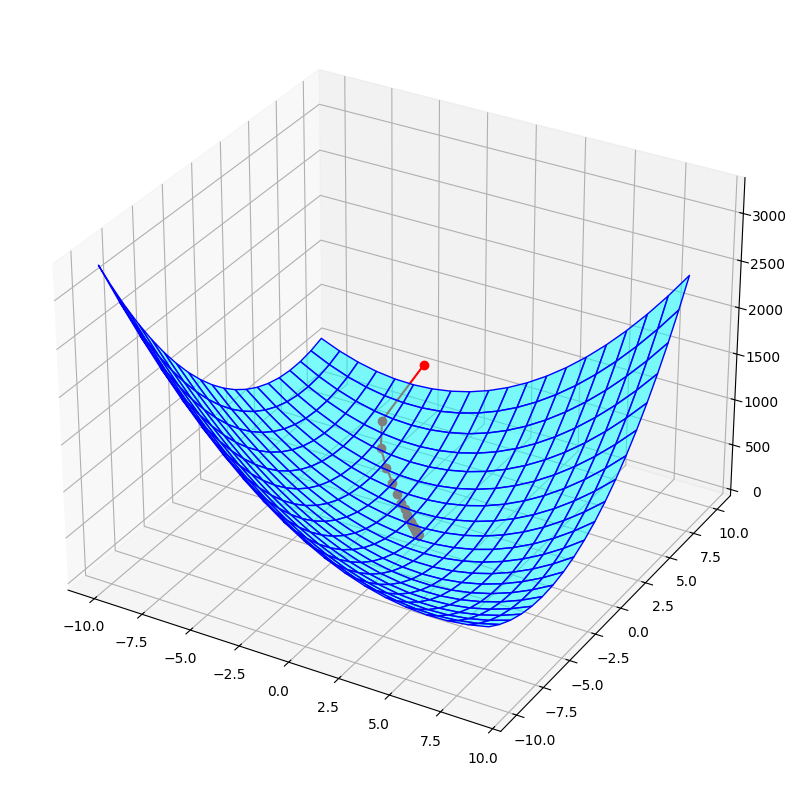

In [8]:
# plot the new estimate
xxplot = [x[0] for x in all_x]
yyplot = [x[1] for x in all_x]
zzplot = F(np.array(xxplot), np.array(yyplot))

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, F(xx, yy), edgecolor=[0, 0, 1], alpha=0.5, facecolor=[0, 1, 1])
ax.plot3D(xxplot, yyplot, zzplot, 'r-o')